In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df_heart = pd.read_csv('MLData/heart.csv')

# Display the first few rows of each dataset for a quick overview
print("Heart Disease Dataset:")
display(df_heart.head())
print("Total rows:", len(df_heart))

Heart Disease Dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Total rows: 918


In [7]:
# Check for missing data
print("Missing values per column:\n")
print(df_heart.isnull().sum())

# Check the percentage of missing data
print("\nPercentage of missing values per column:\n")
print((df_heart.isnull().mean() * 100).round(2))

# Summary of complete vs incomplete rows
total_rows = len(df_heart)
complete_rows = df_heart.dropna().shape[0]
print(f"\nComplete rows: {complete_rows}/{total_rows} ({(complete_rows/total_rows)*100:.2f}%)")

Missing values per column:

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Percentage of missing values per column:

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

Complete rows: 918/918 (100.00%)


In [9]:
# Check for duplicate rows in the dataset
duplicates = df_heart.duplicated()  # Boolean Series indicating duplicates
num_duplicates = duplicates.sum()      # Count how many duplicates exist
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows themselves
if num_duplicates > 0:
    print("Duplicate rows:")
    display(df_heart[duplicates])
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


In [13]:
# Count unique values per column
unique_counts = df_heart.nunique()

# Display the counts sorted descending
unique_counts.sort_values(ascending=False)

Cholesterol       222
MaxHR             119
RestingBP          67
Oldpeak            53
Age                50
ChestPainType       4
RestingECG          3
ST_Slope            3
Sex                 2
FastingBS           2
ExerciseAngina      2
HeartDisease        2
dtype: int64

In [15]:
columns_to_check = [
    'Sex',
    'ChestPainType',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope'
]

for col in columns_to_check:
    print(f"Column: {col}")
    print(df_heart[col].value_counts())
    print("-" * 40)

Column: Sex
Sex
M    725
F    193
Name: count, dtype: int64
----------------------------------------
Column: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------------------
Column: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------------------
Column: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------------------
Column: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------------------


In [17]:
# Make a copy of the original dataframe
df_heart_numeric = df_heart.copy()

# Binary / boolean columns → 0 / 1
df_heart_numeric['Sex'] = df_heart_numeric['Sex'].map({'M': 0, 'F': 1})
df_heart_numeric['ExerciseAngina'] = df_heart_numeric['ExerciseAngina'].map({'N': 0, 'Y': 1})
df_heart_numeric['FastingBS'] = df_heart_numeric['FastingBS'].astype(int)  # already 0/1
df_heart_numeric['HeartDisease'] = df_heart_numeric['HeartDisease'].astype(int)  # target

# Ordered categorical columns → numeric
# ST_Slope can be considered ordinal: Down < Flat < Up
df_heart_numeric['ST_Slope'] = df_heart_numeric['ST_Slope'].map({'Down': 0, 'Flat': 1, 'Up': 2})

# Nominal categorical columns → integer mapping
df_heart_numeric['ChestPainType'] = df_heart_numeric['ChestPainType'].map({'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3})
df_heart_numeric['RestingECG'] = df_heart_numeric['RestingECG'].map({'Normal': 0, 'LVH': 1, 'ST': 2})

# Display numeric columns and first few rows to confirm
numeric_cols = df_heart_numeric.select_dtypes(include=['int64', 'float64']).columns
print("Number of numeric columns:", len(numeric_cols))
df_heart_numeric.head()

Number of numeric columns: 10


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,2,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,2,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,2,0


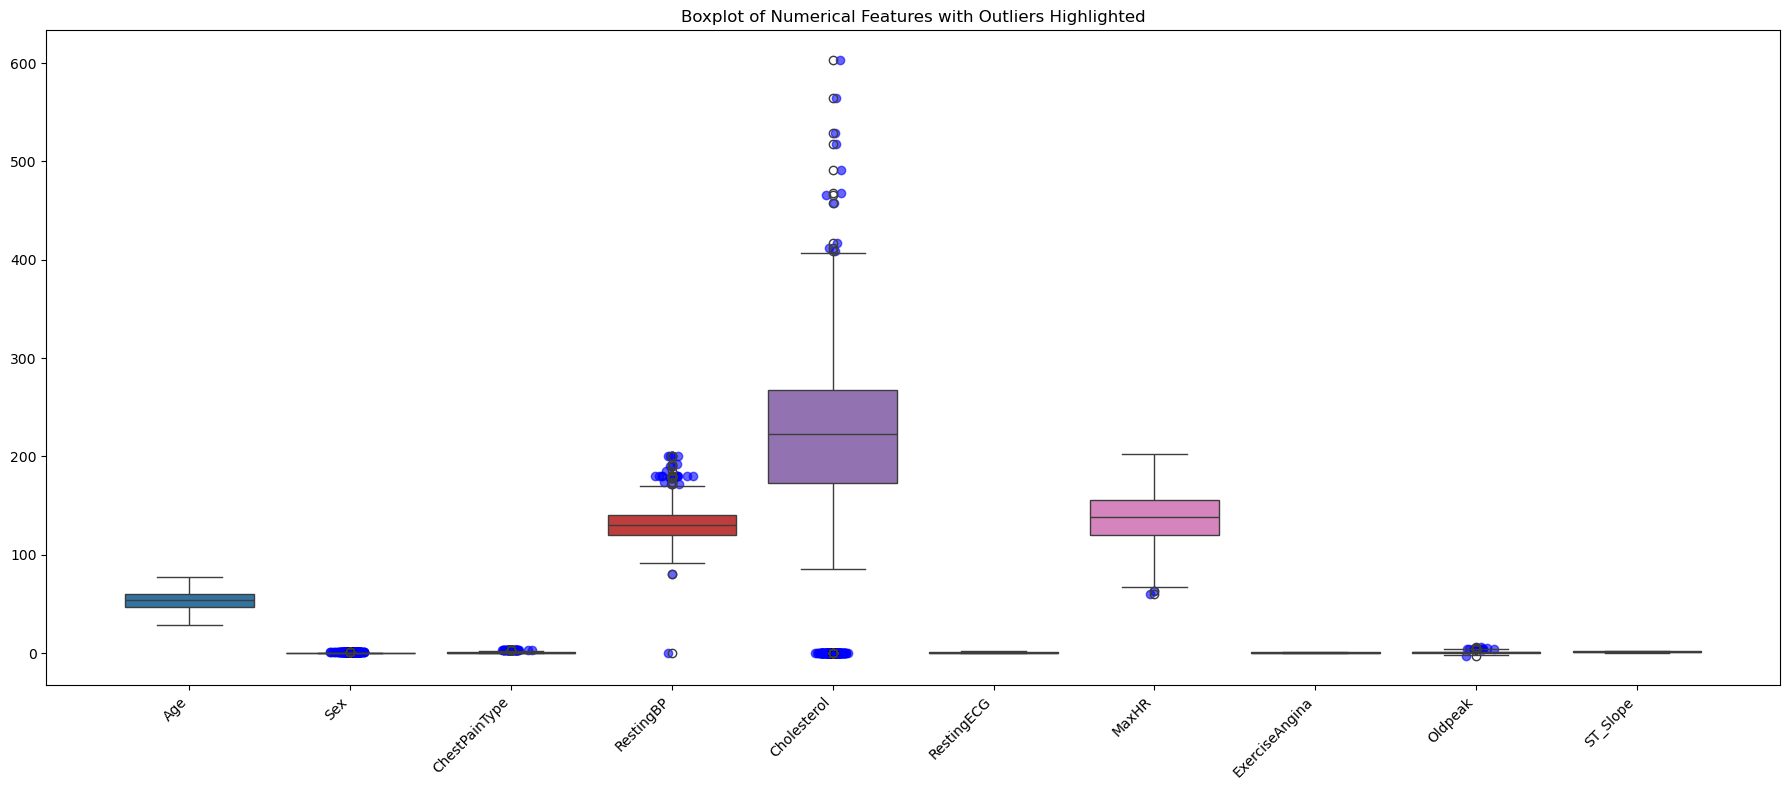

Number of outliers per numeric feature:
Age                 0
Sex               193
ChestPainType      46
RestingBP          28
Cholesterol       183
RestingECG          0
MaxHR               2
ExerciseAngina      0
Oldpeak            16
ST_Slope            0
dtype: int64


In [19]:
# Exclude Age
numeric_df = df_heart_numeric.select_dtypes(include=['int64', 'float64'])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Visualise the outliers
plt.figure(figsize=(18, 8))
sns.boxplot(data=numeric_df, showfliers=True)

# Overlay outliers manually as blue points
for i, col in enumerate(numeric_df.columns):
    y_outliers = numeric_df[col][outlier_mask[col]]
    x_outliers = np.random.normal(i, 0.04, size=len(y_outliers))  # jitter for visibility
    plt.scatter(x_outliers, y_outliers, color='blue', alpha=0.6)

plt.xticks(ticks=range(len(numeric_df.columns)), labels=numeric_df.columns, rotation=45, ha='right')
plt.title("Boxplot of Numerical Features with Outliers Highlighted")
plt.tight_layout()
plt.show()

# Show number of outliers
outliers = outlier_mask.sum()
print("Number of outliers per numeric feature:")
print(outliers)

In [21]:
# Columns to check for outliers
cols_to_check = ['Sex', 'ChestPainType', 'RestingBP', 'Cholesterol','Oldpeak']

# Loop through each column and display outliers
for col in cols_to_check:
    outliers = numeric_df[col][outlier_mask[col]]
    print(f"{col} outlier values:")
    print(outliers.values)
    print()

Sex outlier values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]

ChestPainType outlier values:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3]

RestingBP outlier values:
[190 180 180 180 200 180 180 180  80 200 185 200 180 180   0 178 172 180
 190 174 178 180 200 192 178 180 180 172]

Cholesterol outlier values:
[468 518 412 529 466 603 491   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [23]:
# Make a copy of the dataframe
df_heart_clean = df_heart_numeric.copy()

# RestingBP: replace 0 with median of positive values
restingbp_median = df_heart_clean.loc[df_heart_clean['RestingBP'] > 0, 'RestingBP'].median()
df_heart_clean['RestingBP'] = df_heart_clean['RestingBP'].replace(0, restingbp_median)

# Cholesterol: replace 0 with median of positive values
chol_median = df_heart_clean.loc[df_heart_clean['Cholesterol'] > 0, 'Cholesterol'].median()
df_heart_clean['Cholesterol'] = df_heart_clean['Cholesterol'].replace(0, chol_median)

# Oldpeak: replace negative values with median of non-negative values
oldpeak_median = df_heart_clean.loc[df_heart_clean['Oldpeak'] >= 0, 'Oldpeak'].median()
df_heart_clean['Oldpeak'] = df_heart_clean['Oldpeak'].apply(lambda x: oldpeak_median if x < 0 else x)

# Check for outliers in only the cleaned columns
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

outlier_counts = {col: len(count_outliers(df_heart_clean[col])) for col in ['RestingBP', 'Cholesterol', 'Oldpeak']}
print("Number of outliers after cleaning:")
for col, count in outlier_counts.items():
    print(f"{col:<12} {count}")

# View actual outlier values
for col in outlier_counts:
    outliers = count_outliers(df_heart_clean[col])
    if len(outliers) > 0:
        print(f"\nColumn: {col} Outlier values:")
        print(outliers.values)

df_heart_clean.head()

Number of outliers after cleaning:
RestingBP    27
Cholesterol  41
Oldpeak      15

Column: RestingBP Outlier values:
[190 180 180 180 200 180 180 180  80 200 185 200 180 180 178 172 180 190
 174 178 180 200 192 178 180 180 172]

Column: Cholesterol Outlier values:
[468 518 365 412 529 100  85 392 466 129 393 388 603 404 132 117 355 491
 394 126 347 358 100 458 384 349 113 110 123 369 385 564 407 417 126 354
 360 409 394 353 131]

Column: Oldpeak Outlier values:
[4.  5.  4.  4.  4.  4.  4.  4.2 4.  5.6 3.8 4.2 6.2 4.4 4. ]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,2,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,2,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,2,0


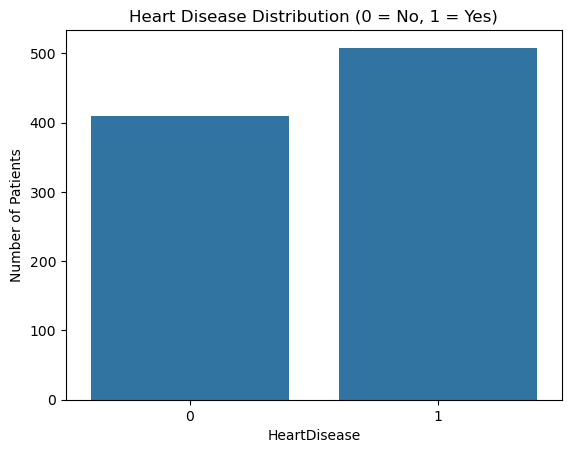

In [27]:
sns.countplot(x='HeartDisease', data=df_heart_clean)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

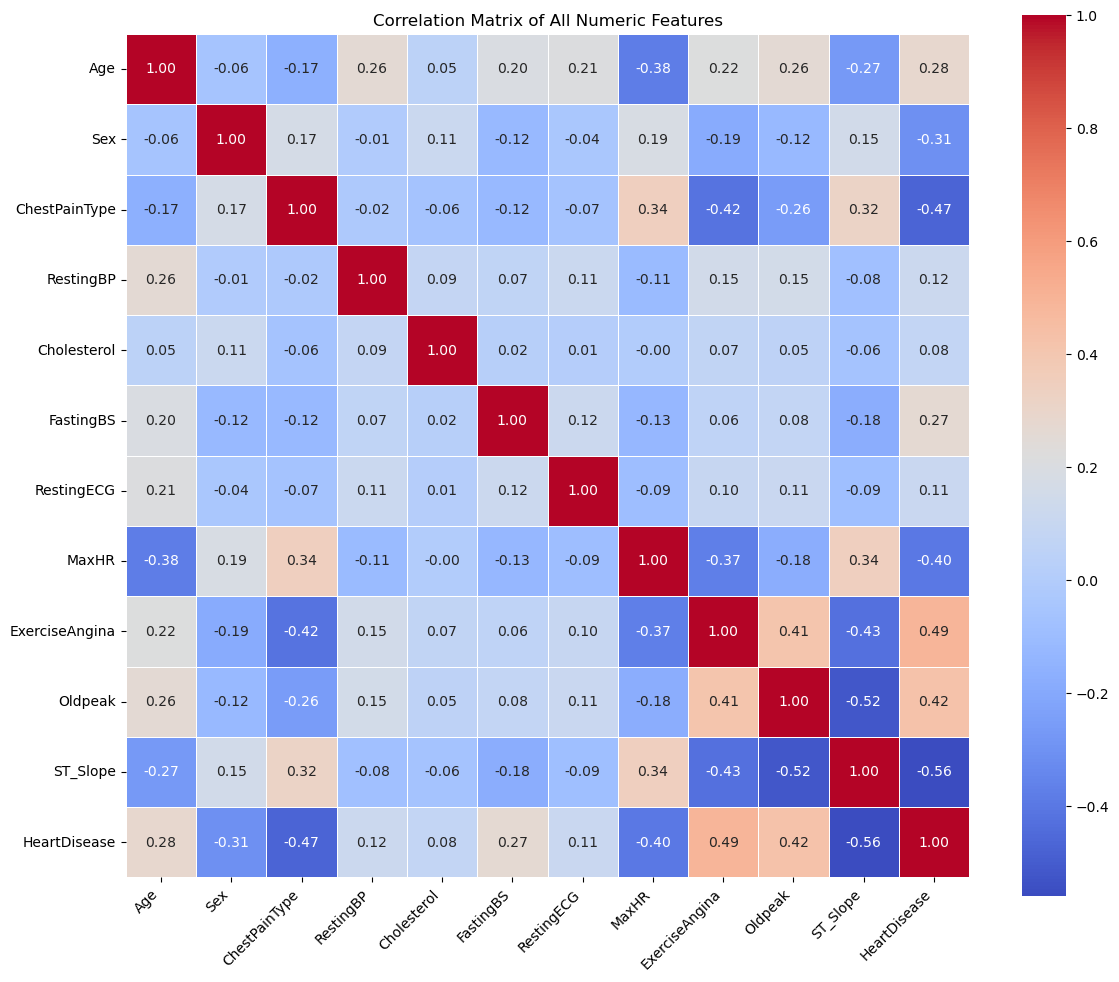

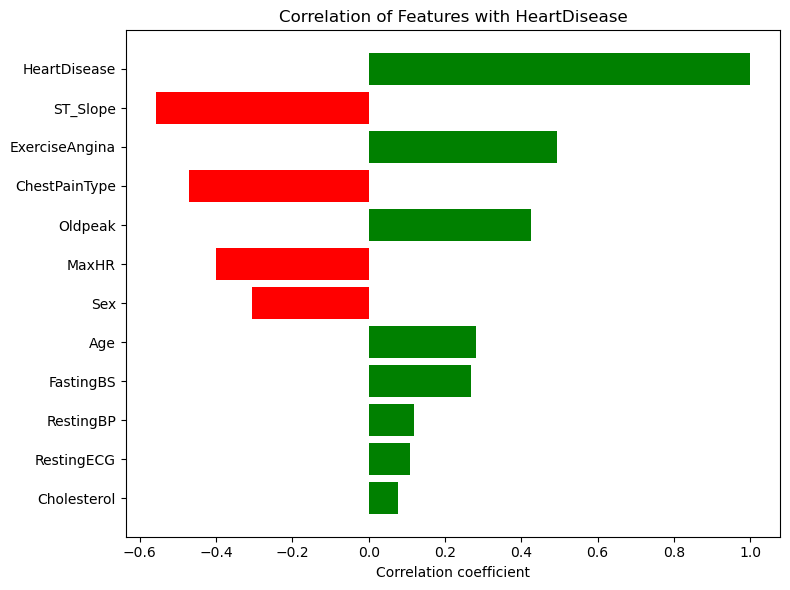


Correlation of numeric features with HeartDisease:

HeartDisease      1.000000
ST_Slope         -0.558771
ExerciseAngina    0.494282
ChestPainType    -0.471354
Oldpeak           0.424747
MaxHR            -0.400421
Sex              -0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.117798
RestingECG        0.107628
Cholesterol       0.076114
Name: HeartDisease, dtype: float64


In [93]:
# Select all numeric columns
numeric_df = df_heart_clean.select_dtypes(include=np.number)

# Compute full correlation matrix
corr_matrix = numeric_df.corr()

# Full heatmap of all numeric features
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of All Numeric Features")
plt.tight_layout()
plt.show()

# Correlation with HeartDisease only (bar chart)
target = 'HeartDisease'
target_corr = corr_matrix[target].sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,6))
colors = ['green' if val > 0 else 'red' for val in target_corr]
plt.barh(target_corr.index, target_corr, color=colors)
plt.xlabel("Correlation coefficient")
plt.title(f"Correlation of Features with {target}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print numeric correlations
print(f"\nCorrelation of numeric features with {target}:\n")
print(target_corr)

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer

Random Forest Accuracy: 0.8804347826086957
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



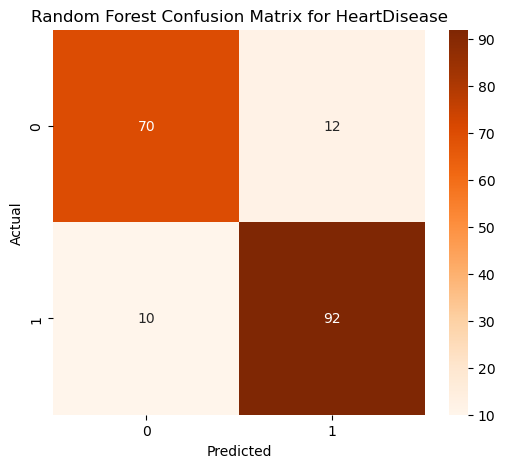

In [55]:
# copy dataframe
df_rf = df_heart_clean.copy()  # use cleaned dataframe

# define target and features
target_col = 'HeartDisease'
X = df_rf.drop(columns=[target_col])
y = df_rf[target_col]

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# initialize and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# predict on test data
y_pred_rf = rf_model.predict(X_test)

# evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix for HeartDisease')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Accuracy after Tuning: 0.8641304347826086
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        82
           1       0.87      0.88      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



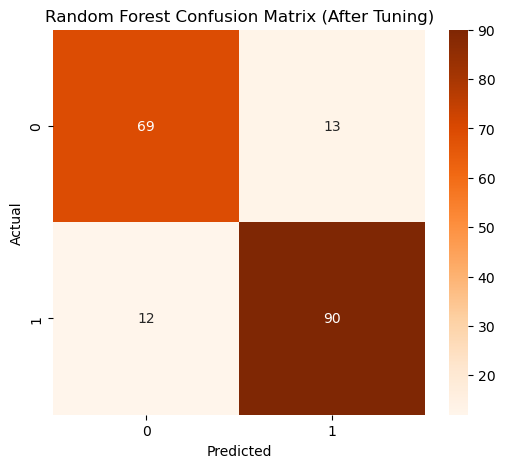

Best parameters found: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': 'balanced'}


In [82]:
# Random Forest Tuning

# Refined hyperparameter grid
rf_param_grid_refined = {
    'n_estimators': [200, 300, 400, 500],       # reasonable number of trees
    'max_depth': [8, 10, 12, None],            # avoid extremely shallow or deep trees
    'min_samples_split': [2, 4, 6],            # prevent overfitting small splits
    'min_samples_leaf': [1, 2, 3],             # ensure leaves have enough samples
    'max_features': ['sqrt', 'log2'],          # typical settings for structured data
    'class_weight': [None]                      # only use 'balanced' if class imbalance is severe
}

# Initialize Random Forest
rf_model_refined = RandomForestClassifier(random_state=42)

# Use stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup RandomizedSearchCV with fewer iterations
rf_random_search_refined = RandomizedSearchCV(
    estimator=rf_model_refined,
    param_distributions=rf_param_grid_refined,
    n_iter=20,        # fewer combinations for speed and stability
    cv=cv,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

# Fit RandomizedSearchCV
rf_random_search_refined.fit(X_train, y_train)

# Predict on test set
y_pred_refined = rf_random_search_refined.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Random Forest Accuracy after Tuning:", accuracy_tuned)
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned, zero_division=0))

# Confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (After Tuning)')
plt.show()

# Best hyperparameters
print("Best parameters found:", rf_random_search.best_params_)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4838 - loss: 13.6605 - val_accuracy: 0.4218 - val_loss: 2.4440
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5043 - loss: 8.5498 - val_accuracy: 0.6259 - val_loss: 1.0020
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5417 - loss: 6.3024 - val_accuracy: 0.6327 - val_loss: 1.2288
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5571 - loss: 4.4612 - val_accuracy: 0.6599 - val_loss: 1.3848
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6184 - loss: 3.5705 - val_accuracy: 0.6667 - val_loss: 1.3996
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5877 - loss: 3.2959 - val_accuracy: 0.6259 - val_loss: 2.5025
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5741 - loss: 2.9810 - val_accuracy: 0.6122 - val_loss: 1.5396
Base Neural Network Test Accuracy: 0.6847826242446899
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Classification Report

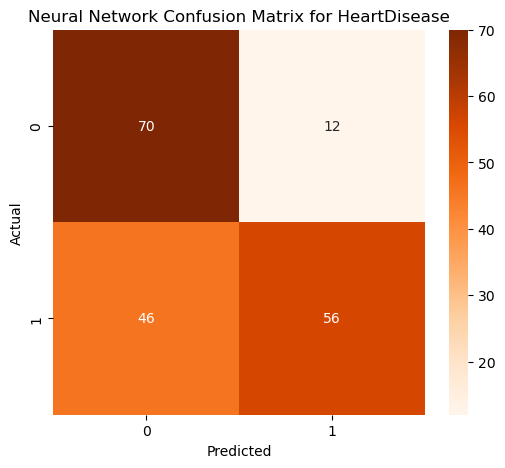

In [70]:
# Copy dataset
df_nn = df_heart_clean.copy()  # already numeric

# Separate features and target
X = df_nn.drop('HeartDisease', axis=1)
y = df_nn['HeartDisease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

input_dim = X_train.shape[1]  # number of features

# Build base neural network
nn_model = Sequential()
nn_model.add(Input(shape=(input_dim,)))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print("Base Neural Network Test Accuracy:", accuracy)

# Predictions
y_pred = np.argmax(nn_model.predict(X_test), axis=1)
print("Classification Report")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix for HeartDisease')
plt.show()

In [114]:
pip install keras-tuner --upgrade


   ---------------------------------------- 0.0/129.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/129.4 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 129.4/129.4 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.4.7
    Uninstalling keras-tuner-1.4.7:
      Successfully uninstalled keras-tuner-1.4.7


Reloading Tuner from .\nn_heart_disease\tuner0.json


D:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Tuned Neural Network Test Accuracy: 0.8695651888847351
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report (Tuned NN)
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        82
           1       0.85      0.92      0.89       102

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



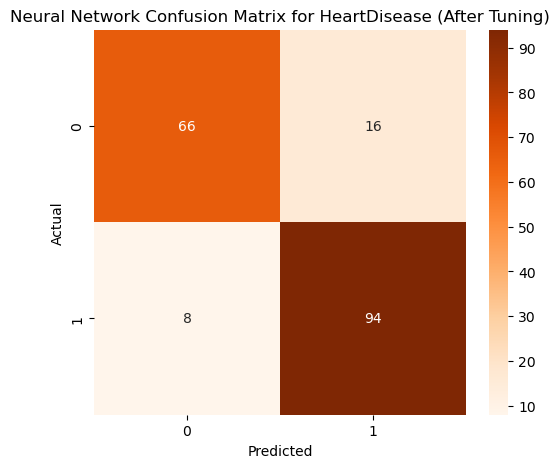

Best Hyperparameters Found:
{'units_1': 128, 'dropout_1': 0.1, 'second_layer': False, 'learning_rate': 0.0005990969855590758, 'units_2': 32, 'dropout_2': 0.4, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0076'}


In [90]:
# Define model-building function for hyperparameter tuning
def build_nn_model(hp):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # input layer

    # First hidden layer with tunable units and dropout
    units_1 = hp.Int('units_1', 32, 128, step=16)
    model.add(Dense(units_1, activation='relu'))
    dropout_1 = hp.Float('dropout_1', 0.1, 0.5, step=0.1)
    model.add(Dropout(dropout_1))

    # Optional second hidden layer
    if hp.Boolean('second_layer'):
        units_2 = hp.Int('units_2', 16, 64, step=16)
        model.add(Dense(units_2, activation='relu'))
        dropout_2 = hp.Float('dropout_2', 0.1, 0.5, step=0.1)
        model.add(Dropout(dropout_2))

    # Output layer
    model.add(Dense(len(np.unique(y)), activation='softmax'))

    # Compile model using Adam optimizer
    model.compile(
        optimizer='adam',  # keep Adam simple
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize Hyperband tuner
tuner = kt.Hyperband(
    build_nn_model,
    objective='val_accuracy',  # tune for validation accuracy
    max_epochs=50,
    factor=3,
    directory=None,            # avoid file saving issues
    project_name='nn_heart_disease'
)

# Early stopping to prevent overfitting
stop_early = EarlyStopping(monitor='val_loss', patience=5)

# Search for best hyperparameters
tuner.search(
    X_train.values, y_train.values,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[stop_early],
    verbose=1
)

# Retrieve best model found by tuner
best_nn_model = tuner.get_best_models(num_models=1)[0]

# Evaluate tuned model on test set
loss, accuracy = best_nn_model.evaluate(X_test.values, y_test.values, verbose=0)
print("Tuned Neural Network Test Accuracy:", accuracy)

# Predict class labels for test set
y_pred_tuned = np.argmax(best_nn_model.predict(X_test.values, batch_size=32), axis=1)

# Classification report for tuned model
print("Classification Report (Tuned NN)")
print(classification_report(y_test, y_pred_tuned, zero_division=0))

# Confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix for HeartDisease (After Tuning)')
plt.show()

# Display best hyperparameters found by Hyperband
print("Best Hyperparameters Found:")
print(tuner.get_best_hyperparameters(num_trials=1)[0].values)